In [59]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [60]:
%cd "/gdrive/My Drive/Nonparametric"

/gdrive/My Drive/Nonparametric


In [61]:
import geopandas as gpd
import geoplot
filename = 'Refugee_Settlements_Electricity_Access_DB_ver02-0.gpkg'
gdf = gpd.read_file(filename)

In [62]:
import matplotlib.pyplot as plt
import folium
import mapclassify
import pandas as pd

In [158]:
import numpy as np

In [77]:
campi = gdf["geometry"]
campi

0       POINT (30.27150 -3.35220)
1       POINT (30.20680 -2.88180)
2       POINT (30.42800 -3.20100)
3       POINT (30.11090 -2.85230)
4       POINT (30.31280 -3.28960)
                  ...            
286    POINT (25.88080 -12.49830)
287    POINT (32.30766 -20.34653)
288       POINT (0.00000 0.00000)
289       POINT (0.00000 0.00000)
290       POINT (0.00000 0.00000)
Name: geometry, Length: 291, dtype: geometry

In [132]:
gdf["x"] = campi.x
gdf["y"] = campi.y

In [162]:
gdf_coord = gdf[["x","y"]]

In [163]:
gdf_coord

,x,y
0,30.271500,-3.352200
1,30.206800,-2.881800
2,30.428000,-3.201000
3,30.110900,-2.852300
4,30.312800,-3.289600
...,...,...
286,25.880800,-12.498300
287,32.307663,-20.346534
288,0.000000,0.000000
289,0.000000,0.000000


In [165]:
gdf_coord.to_csv(r'centroids.csv')

In [65]:
gdf["centroid"]=gdf.centroid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


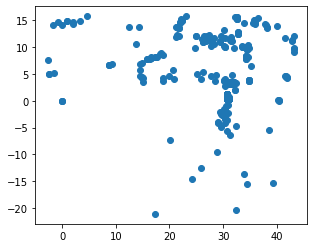

In [66]:
ax = gdf["geometry"].plot()
# gdf["centroid"].plot(ax=ax, color="black")

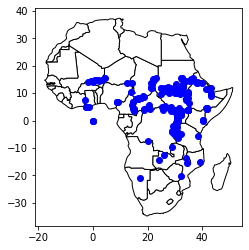

In [72]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to Africa.
ax = world[world.continent == 'Africa'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='blue')

plt.show()

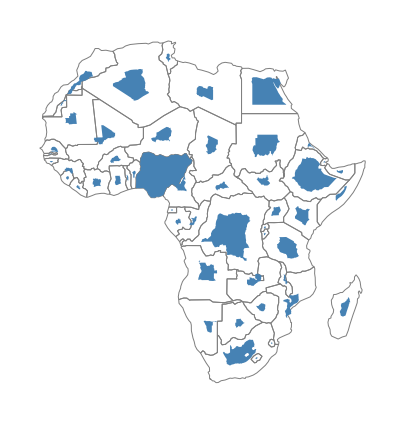

In [73]:
africa = world.query('continent == "Africa"')
ax = geoplot.cartogram(
    africa, scale='pop_est', limits=(0.2, 1),
    edgecolor='None', figsize=(7, 8)
)
geoplot.polyplot(africa, edgecolor='gray', ax=ax)

##Folium map

In [89]:
campi.y

0      -3.352200
1      -2.881800
2      -3.201000
3      -2.852300
4      -3.289600
         ...    
286   -12.498300
287   -20.346534
288     0.000000
289     0.000000
290     0.000000
Length: 291, dtype: float64

In [100]:
m = folium.Map(location=[0, 22.45], zoom_start=4.5, tiles='CartoDB positron')
for i in campi:
    lat = i.y
    lon = i.x
    folium.Marker(location=[lat, lon],).add_to(m)

m

In [118]:
africa[world["continent"] == "Africa"]
africa.columns

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1327: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

In [124]:
africa

,pop_est,name,iso_a3,gdp_md_est,geometry
1,53950935,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
11,83301151,Dem. Rep. Congo,COD,66010.0,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998..."
12,7531386,Somalia,SOM,4719.0,"POLYGON ((41.58513 -1.68325, 40.99300 -0.85829..."
13,47615739,Kenya,KEN,152700.0,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712..."
14,37345935,Sudan,SDN,176300.0,"POLYGON ((24.56737 8.22919, 23.80581 8.66632, ..."
15,12075985,Chad,TCD,30590.0,"POLYGON ((23.83766 19.58047, 23.88689 15.61084..."
25,54841552,South Africa,ZAF,739100.0,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082..."
26,1958042,Lesotho,LSO,6019.0,"POLYGON ((28.97826 -28.95560, 29.32517 -29.257..."
48,13805084,Zimbabwe,ZWE,28330.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."


In [128]:
africa.explore(column = "name",
               tooltip="name",
               tiles="CartoDB positron")

TypeError: ignored

In [109]:
nybb

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [106]:
nybb.explore(campi)

ValueError: ignored

In [107]:
gpd.explore(campi)

TypeError: ignored